In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
df_train = pd.read_csv("Train.csv")

In [4]:
df_test = pd.read_csv("TestFileExample.csv")

In [5]:
def data_details(df):
    x = df.shape
    y = df.columns.tolist()
    z = df.head()
    print(x)
    print(y)
    print(z)

In [6]:
data_details(df_train)

(14000, 6)
['TimeStamp', 'StandardTemperature', 'Humidity', 'Wind', 'Ticket1', 'Ticket2']
             TimeStamp  StandardTemperature  Humidity      Wind  Ticket1  \
0  2068-04-18 03:00:00             0.284836  47.75442  0.221554        1   
1  2068-05-20 19:00:00             0.614588  48.72900  0.413520      108   
2  2067-06-10 21:00:00             0.614588  28.26282  0.103405       52   
3  2067-01-08 02:00:00             0.269797  77.96640  0.000000        6   
4  2067-08-07 00:00:00             0.689581  53.60190  0.088661       34   

   Ticket2  
0        3  
1      233  
2      197  
3       28  
4       81  


In [74]:
df_train.describe()

,StandardTemperature,Humidity,Wind,Ticket1,Ticket2,month,hour,day,year,dayofweek
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.474355,60.752950,0.191823,35.175500,142.251214,5.748714,11.546286,15.703786,2067.394286,3.005500
std,0.175030,19.292659,0.121645,47.354152,138.287013,3.184764,6.912059,8.720144,0.488714,2.000189
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2067.000000,0.000000
25%,0.329752,45.805260,0.103405,5.000000,32.000000,3.000000,6.000000,8.000000,2067.000000,1.000000
50%,0.487159,60.423960,0.191967,17.000000,108.000000,6.000000,12.000000,16.000000,2067.000000,3.000000
75%,0.614588,76.991820,0.280628,47.000000,204.000000,8.000000,18.000000,23.000000,2068.000000,5.000000
max,0.989356,97.458000,0.841785,368.000000,797.000000,12.000000,23.000000,31.000000,2068.000000,6.000000


In [7]:
data_details(df_test)

(99, 4)
['TimeStamp', 'StandardTemperature', 'Humidity', 'Wind']
        TimeStamp  StandardTemperature  Humidity      Wind
0   8/29/68 21:00             0.599649  71.14434  0.000000
1    9/21/68 5:00             0.509716  80.89014  0.000000
2    9/14/68 3:00             0.569671  80.89014  0.088661
3  11/15/68 19:00             0.389707  26.31366  0.354446
4   12/12/68 0:00             0.479640  57.50022  0.280628


# EDA of Train Data set

In [12]:
df_train['TimeStamp'] = pd.to_datetime(df_train['TimeStamp'])

In [18]:
df_train['month']=df_train['TimeStamp'].apply(lambda x:x.month)
df_train['hour']=df_train['TimeStamp'].apply(lambda x:x.hour)
df_train['day']=df_train['TimeStamp'].apply(lambda x:x.day)
df_train['year']=df_train['TimeStamp'].apply(lambda x:x.year)
df_train['dayofweek']=df_train['TimeStamp'].apply(lambda x:x.weekday())

In [19]:
df_train.head()

,TimeStamp,StandardTemperature,Humidity,Wind,Ticket1,Ticket2,month,hour,day,year,dayofweek
0,2068-04-18 03:00:00,0.284836,47.75442,0.221554,1,3,4,3,18,2068,2
1,2068-05-20 19:00:00,0.614588,48.72900,0.413520,108,233,5,19,20,2068,6
2,2067-06-10 21:00:00,0.614588,28.26282,0.103405,52,197,6,21,10,2067,4
3,2067-01-08 02:00:00,0.269797,77.96640,0.000000,6,28,1,2,8,2067,5
4,2067-08-07 00:00:00,0.689581,53.60190,0.088661,34,81,8,0,7,2067,6


In [21]:
#data_to_plot = [df['TimeStamp'],df['StandardTemperature'],df['Humidity'],df['Wind']]

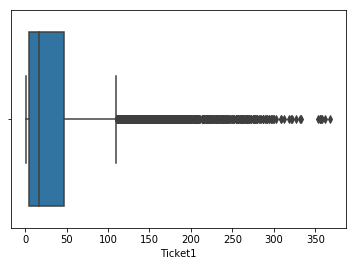

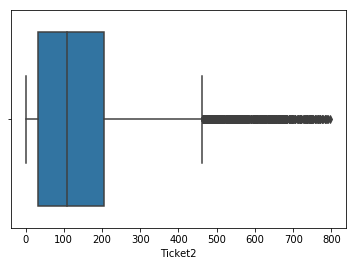

In [9]:
sns.boxplot(df_train['Ticket1'])
plt.show()
sns.boxplot(df_train['Ticket2'])
plt.show()

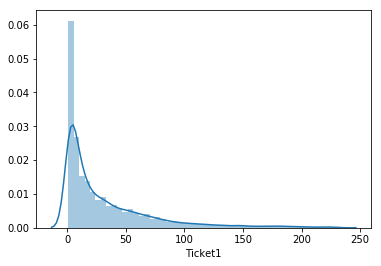

In [93]:
cnt=df_train['Ticket1'].values
q99=np.percentile(cnt,[99])


df_train1=df_train[df_train['Ticket1']<q99[0]]
sns.distplot(df_train1['Ticket1'])
plt.show()

C:\Users\bbnsu_000\Anaconda2\envs\project\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


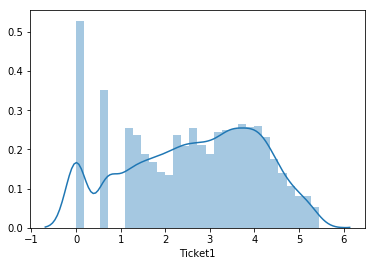

0        0.000000
1        4.682131
2        3.951244
3        1.791759
4        3.526361
5        2.302585
6        4.110874
7        3.931826
8        4.442651
9        0.000000
10       3.688879
11       2.944439
12       1.791759
13       2.639057
14       2.302585
15       4.143135
16       0.000000
17       0.000000
18       4.736198
20       4.110874
21       2.708050
22       2.833213
23       3.891820
24       5.129899
25       4.262680
26       5.438079
27       3.401197
28       0.000000
29       0.693147
30       2.079442
           ...   
13970    3.526361
13971    3.433987
13972    3.367296
13973    3.737670
13974    1.791759
13975    1.386294
13976    3.433987
13977    2.708050
13978    4.276666
13979    1.791759
13980    2.079442
13981    2.397895
13982    2.197225
13983    5.017280
13984    2.079442
13985    0.693147
13986    0.000000
13987    3.988984
13988    0.000000
13989    2.995732
13990    1.791759
13991    5.062595
13992    0.000000
13993    0.000000
13994    2

In [94]:
#from scipy.stats import boxcox
df_train1['Ticket1']=df_train1['Ticket1'].apply(lambda x:np.log(x))
#train_df['count']=boxcox(train_df['count'])[0]
sns.distplot(df_train1['Ticket1'])
plt.show()
print (df_train1['Ticket1'])

[Text(0,0.5,u'Ticket1'),
 Text(0.5,0,u'dayofweek'),
 Text(0.5,1,u'Box Plot On Count Across dayofweek')]

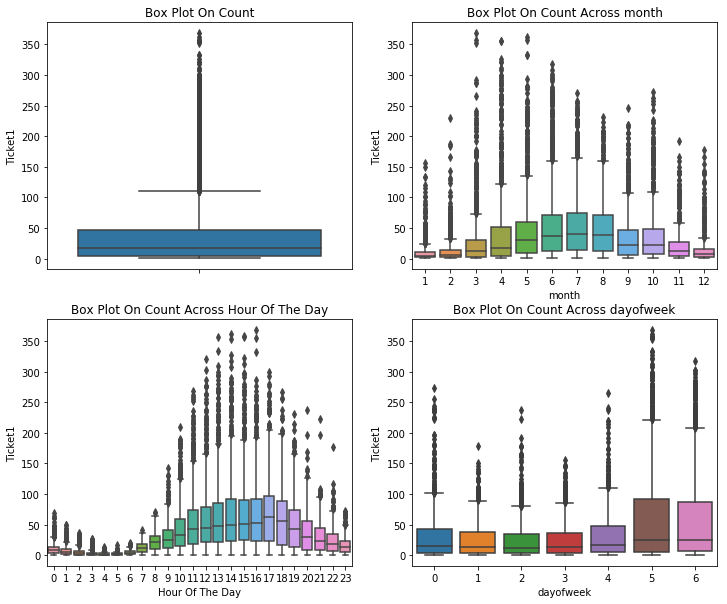

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train,y="Ticket1",orient="v",ax=axes[0][0])
sns.boxplot(data=df_train,y="Ticket1",x="month",orient="v",ax=axes[0][1])
sns.boxplot(data=df_train,y="Ticket1",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df_train,y="Ticket1",x="dayofweek",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Ticket1',title="Box Plot On Count")
axes[0][1].set(xlabel='month', ylabel='Ticket1',title="Box Plot On Count Across month")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Ticket1',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='dayofweek', ylabel='Ticket1',title="Box Plot On Count Across dayofweek")

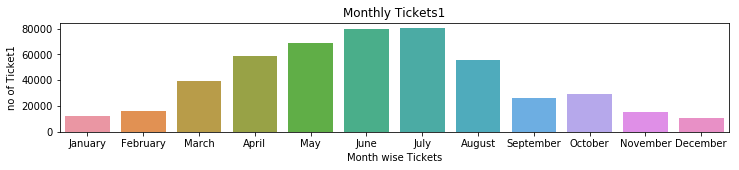

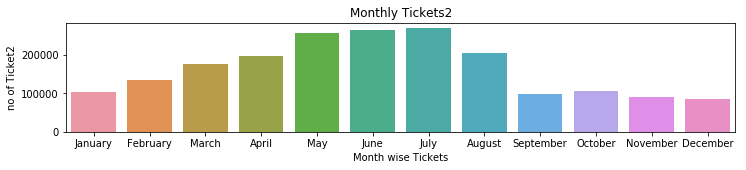

In [58]:
#Monthly
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,2))
month_wise1=df_train.groupby('month').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='month',y='Ticket1',data=month_wise1)
plt.xlabel('Month wise Tickets')
plt.ylabel('no of Ticket1')
plt.xticks(range(0,12),month_names[:12])
plt.title('Monthly Tickets1')
pass

month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,2))
month_wise2=df_train.groupby('month').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='month',y='Ticket2',data=month_wise2)
plt.xlabel('Month wise Tickets')
plt.ylabel('no of Ticket2')
plt.xticks(range(0,12),month_names[:12])
plt.title('Monthly Tickets2')
pass


we can bin them as seasons. Feb-Apr, ma-Aug, sep-jan

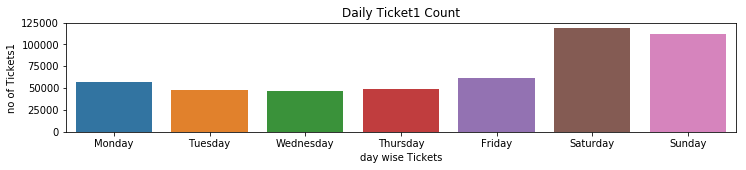

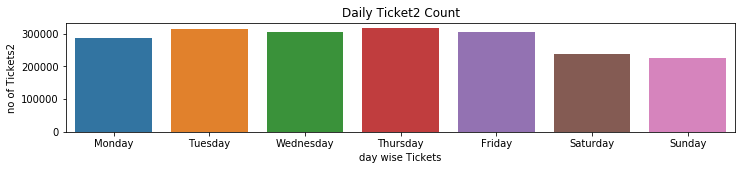

In [59]:
#Day of a week
weekday_names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,2))
day_wise1=df_train.groupby('dayofweek').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='dayofweek',y='Ticket1',data=day_wise1)
plt.xlabel('day wise Tickets')
plt.ylabel('no of Tickets1')
plt.xticks(range(0,7),weekday_names)
plt.title('Daily Ticket1 Count')
pass

weekday_names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,2))
day_wise2=df_train.groupby('dayofweek').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='dayofweek',y='Ticket2',data=day_wise2)
plt.xlabel('day wise Tickets')
plt.ylabel('no of Tickets2')
plt.xticks(range(0,7),weekday_names)
plt.title('Daily Ticket2 Count')
pass

We can see the behaviour type of tickets is quite opposite wrt to weekdasy and weekends

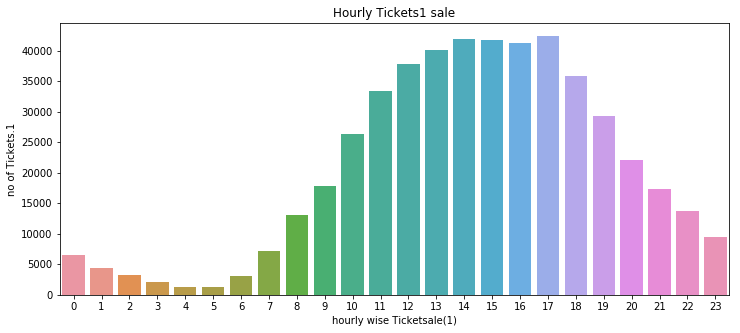

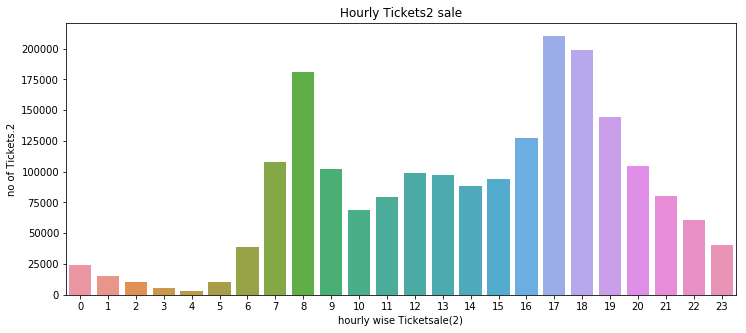

In [60]:
#Hourly
plt.figure(figsize=(12,5))
hour_wise1=df_train.groupby('hour').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='hour',y='Ticket1',data=hour_wise1)
plt.xlabel('hourly wise Ticketsale(1)')
plt.ylabel('no of Tickets.1')
plt.title('Hourly Tickets1 sale')
pass

plt.figure(figsize=(12,5))
hour_wise2=df_train.groupby('hour').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='hour',y='Ticket2',data=hour_wise2)
plt.xlabel('hourly wise Ticketsale(2)')
plt.ylabel('no of Tickets.2')
plt.title('Hourly Tickets2 sale')
pass

We can see the behaviour type of tickets is quite opposite wrt to hour of the day also

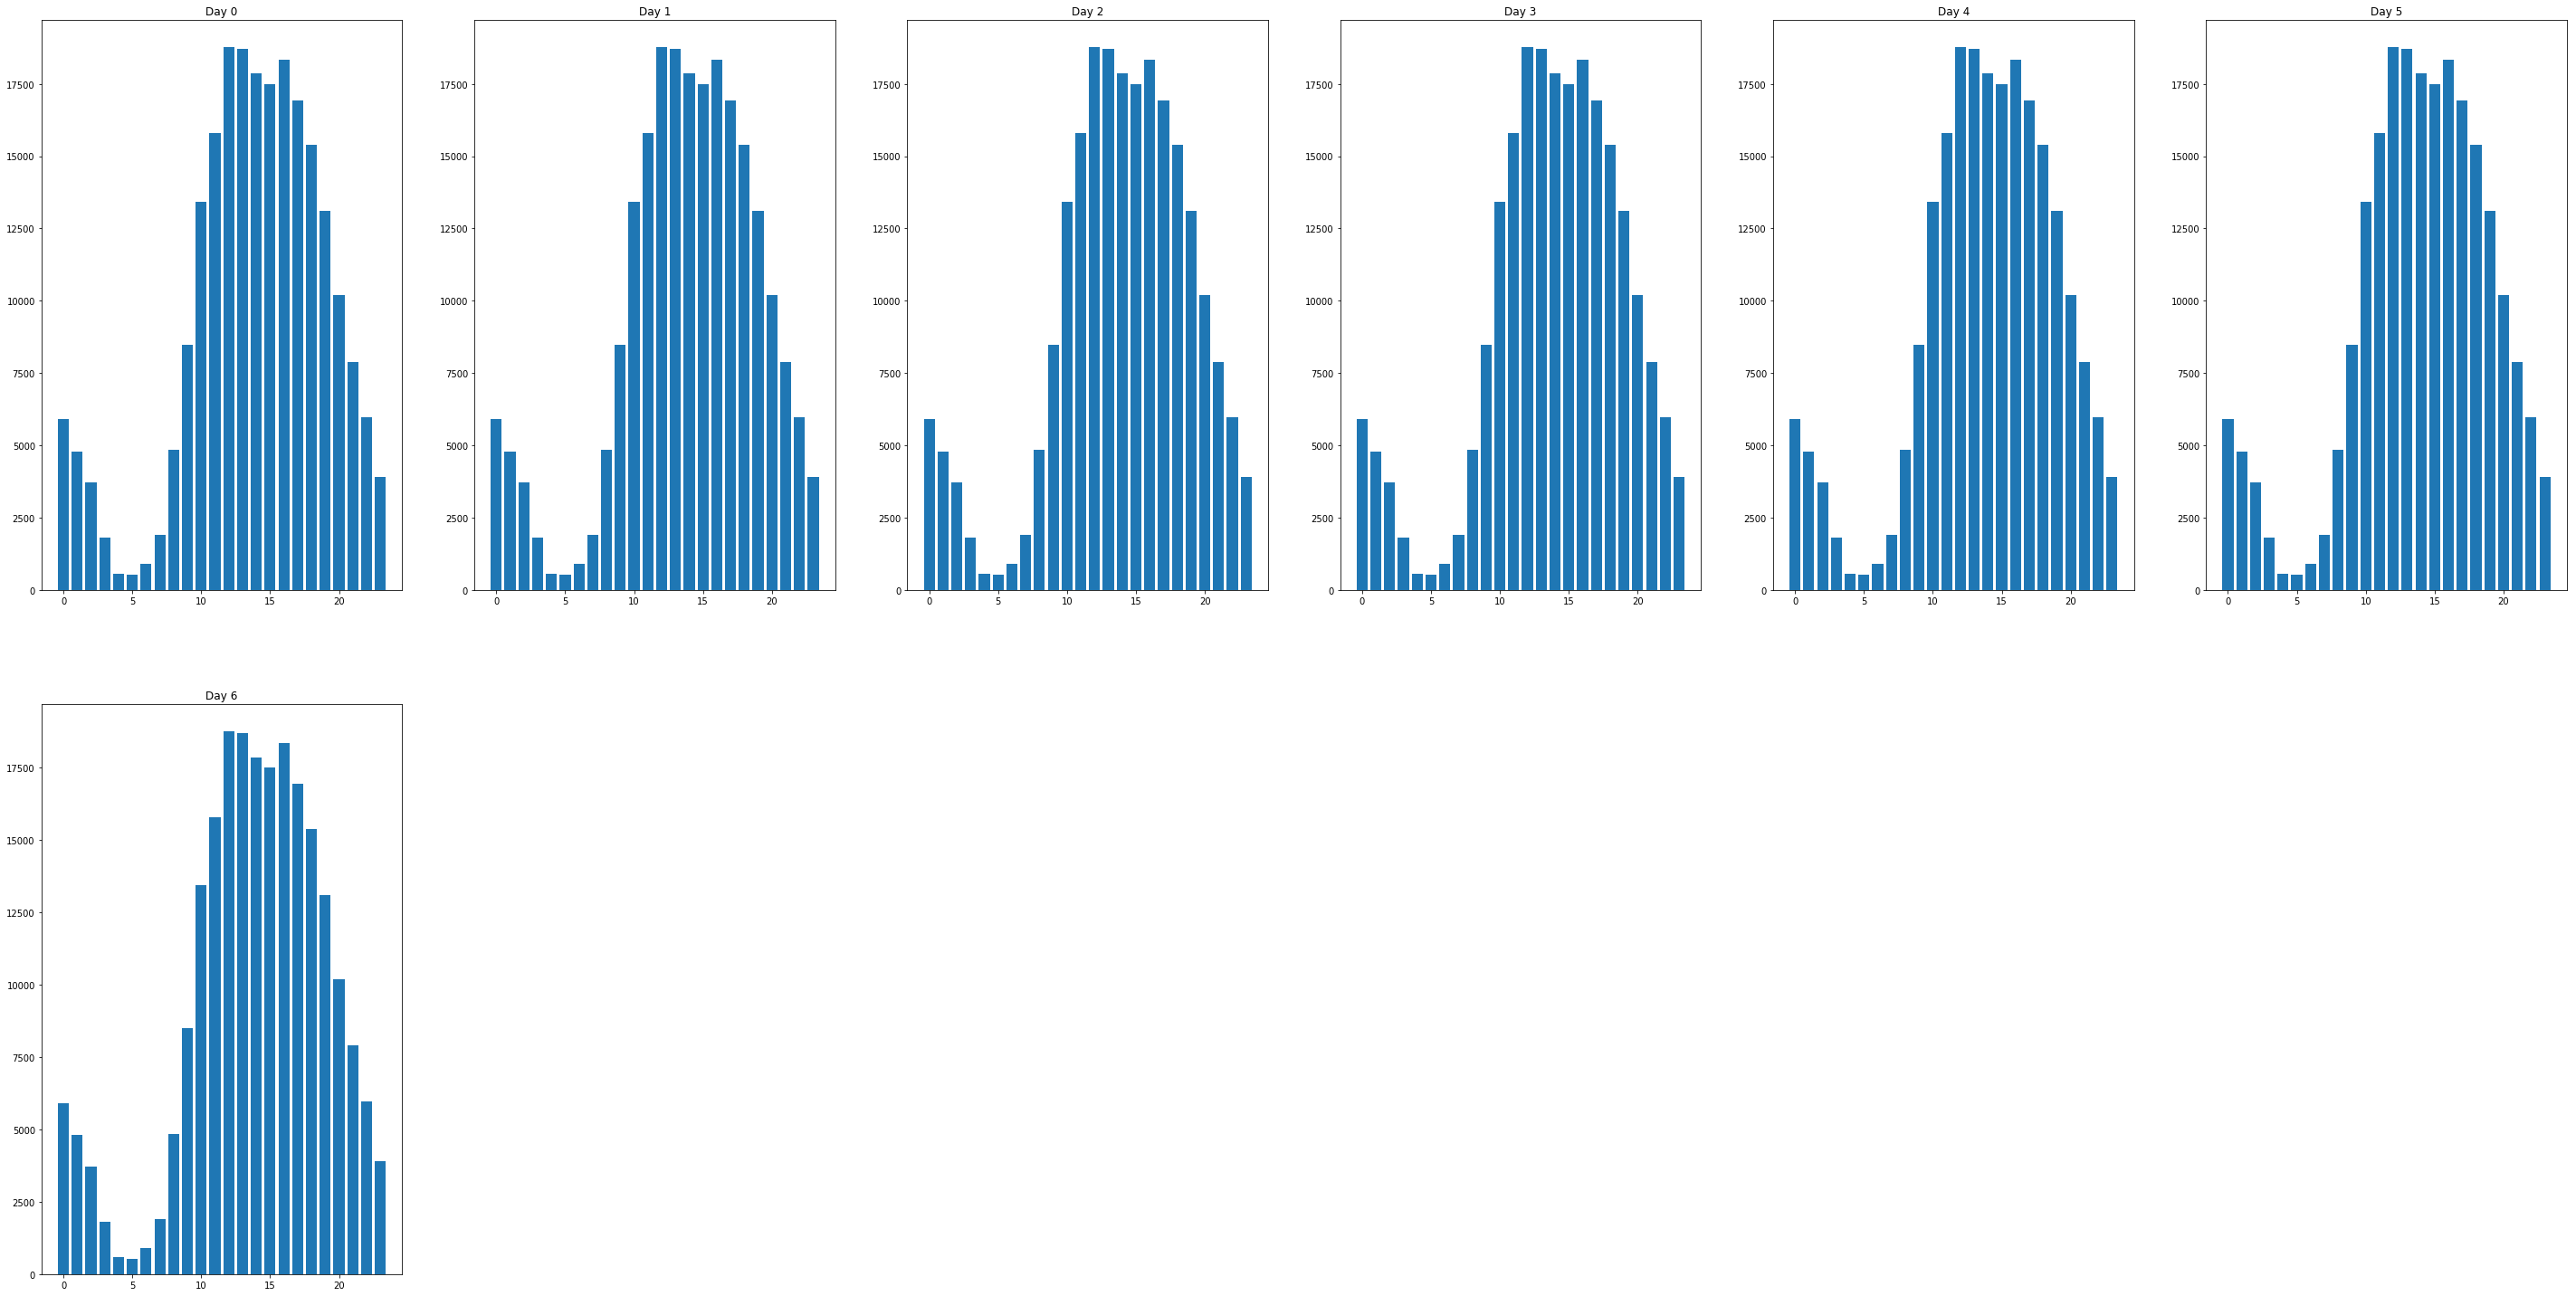

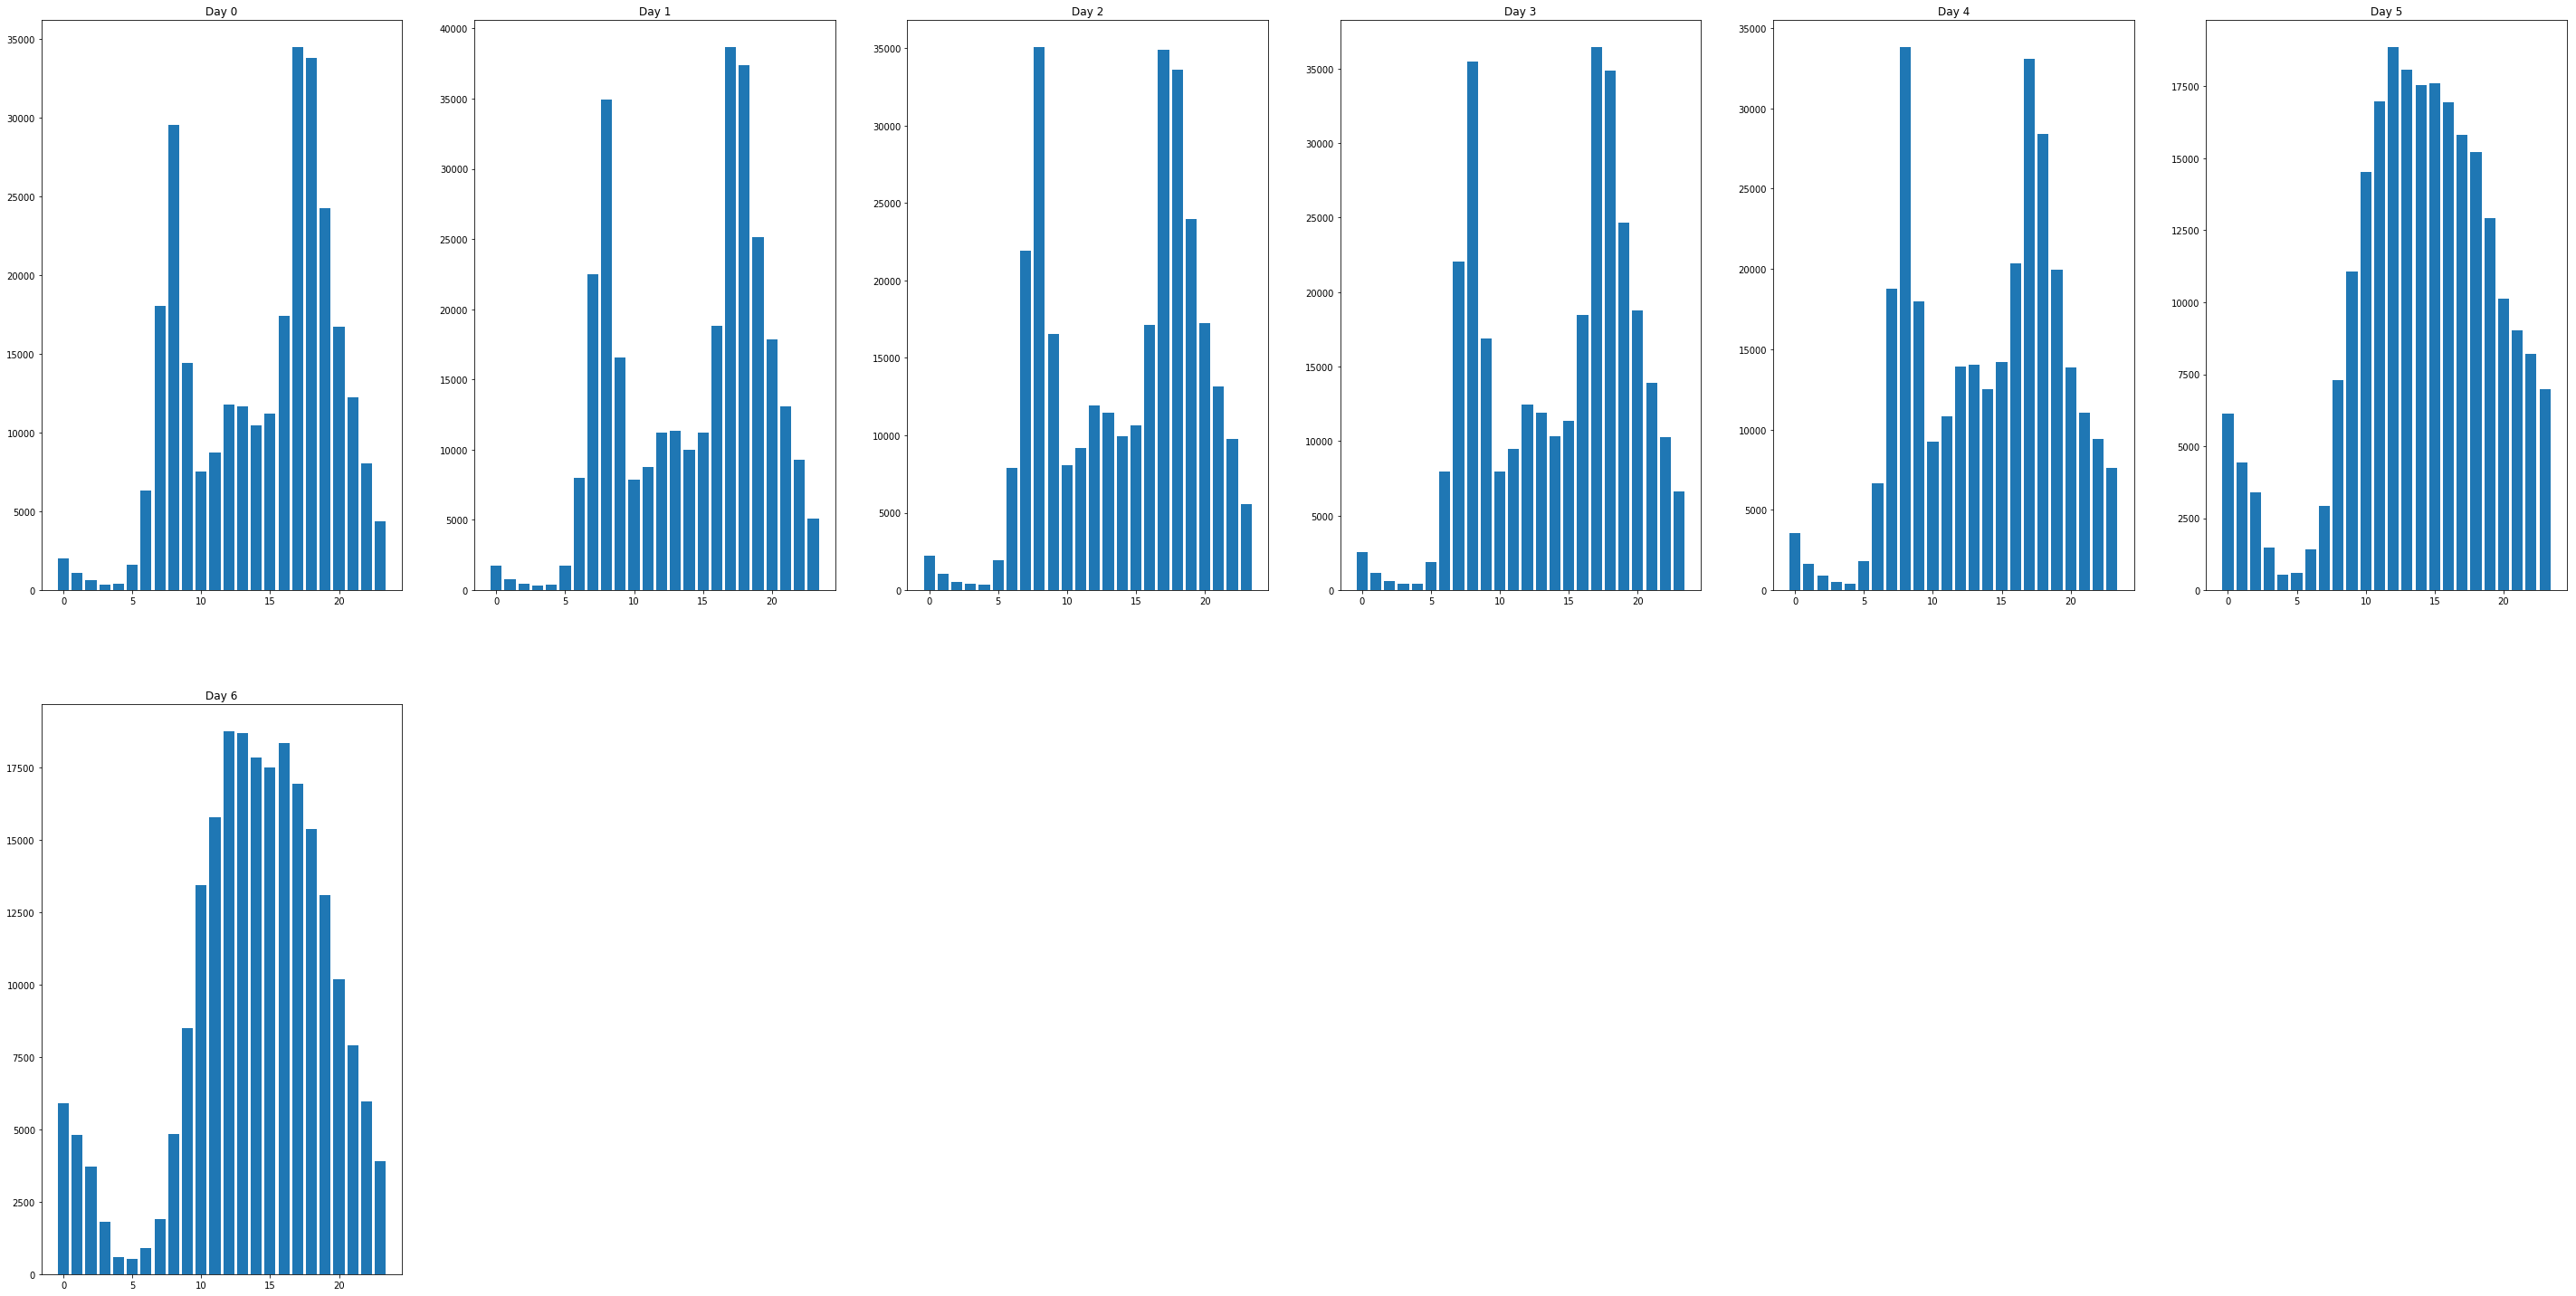

In [71]:
plt.figure(figsize=(50,95))
week = [0,1,2,3,4,5,6]
j=0
for i in week:
    j+=1
    plt.subplot(7,6,j)
    plt.title("Day %s" % i)
    wk_hr1 =df_train[df_train['dayofweek'] == i].groupby(['hour']).Ticket1.sum()
    plt.bar(wk_hr1.index, wk_hr2.values)

plt.show()
pass

plt.figure(figsize=(50,95))
week = [0,1,2,3,4,5,6]
j=0
for i in week:
    j+=1
    plt.subplot(7,6,j)
    plt.title("Day %s" % i)
    wk_hr2 =df_train[df_train['dayofweek'] == i].groupby(['hour']).Ticket2.sum()
    plt.bar(wk_hr2.index, wk_hr2.values)

plt.show()
pass

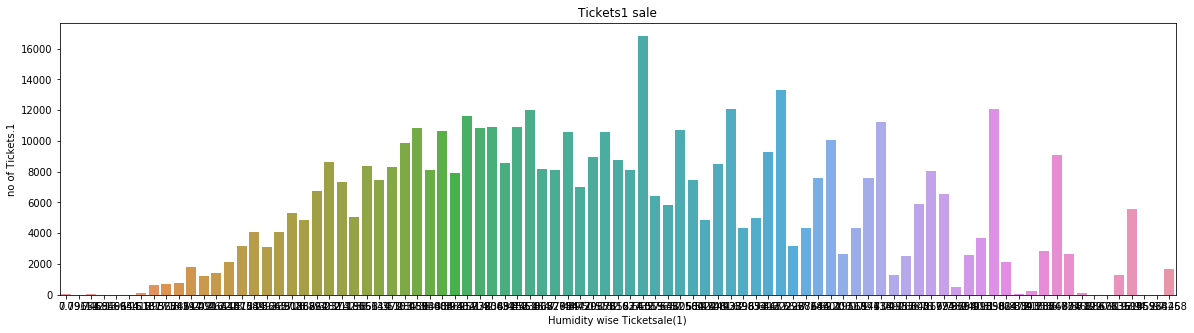

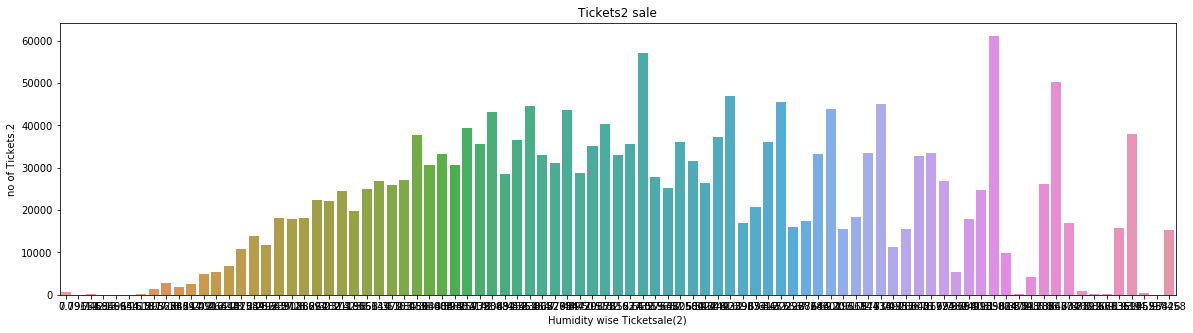

In [63]:
plt.figure(figsize=(20,5))
Humidity1=df_train.groupby('Humidity').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='Humidity',y='Ticket1',data=Humidity1)
plt.xlabel('Humidity wise Ticketsale(1)')
plt.ylabel('no of Tickets.1')
plt.title('Humidity - Tickets1 sale')
pass

plt.figure(figsize=(20,5))
Humidity2=df_train.groupby('Humidity').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='Humidity',y='Ticket2',data=Humidity2)
plt.xlabel('Humidity wise Ticketsale(2)')
plt.ylabel('no of Tickets.2')
plt.title('Humidity - Tickets2 sale')
pass

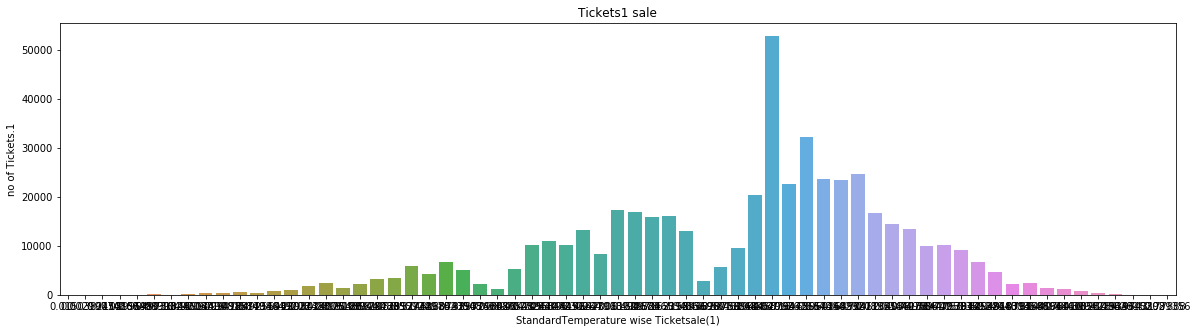

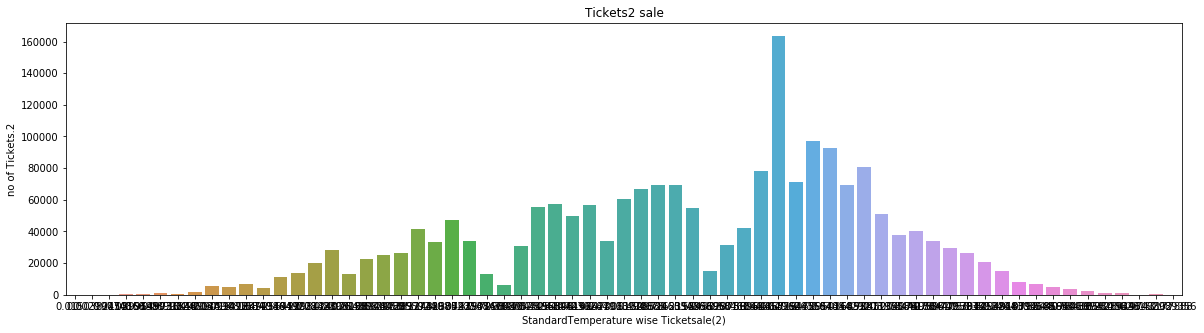

In [64]:
plt.figure(figsize=(20,5))
StandardTemperature1=df_train.groupby('StandardTemperature').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='StandardTemperature',y='Ticket1',data=StandardTemperature1)
plt.xlabel('StandardTemperature wise Ticketsale(1)')
plt.ylabel('no of Tickets.1')
plt.title('Temp - Tickets1 sale')
pass

plt.figure(figsize=(20,5))
StandardTemperature2=df_train.groupby('StandardTemperature').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='StandardTemperature',y='Ticket2',data=StandardTemperature2)
plt.xlabel('StandardTemperature wise Ticketsale(2)')
plt.ylabel('no of Tickets.2')
plt.title('Temp - Tickets2 sale')
pass

In [ ]:
#Why one reading high. what about extreme ends?

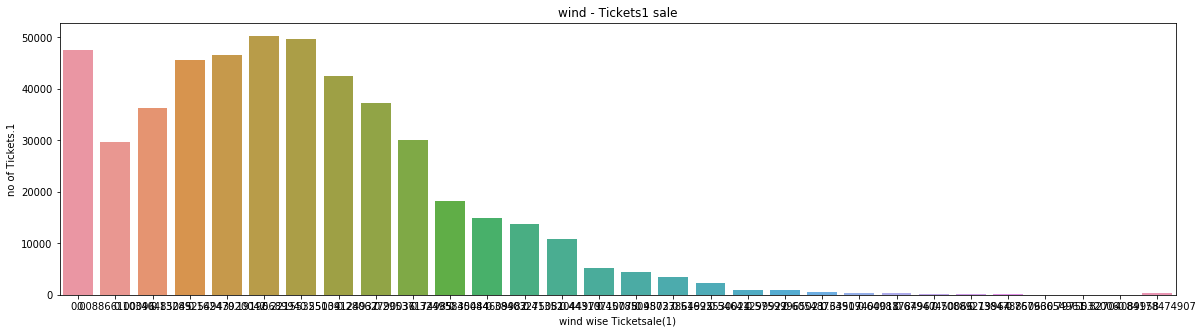

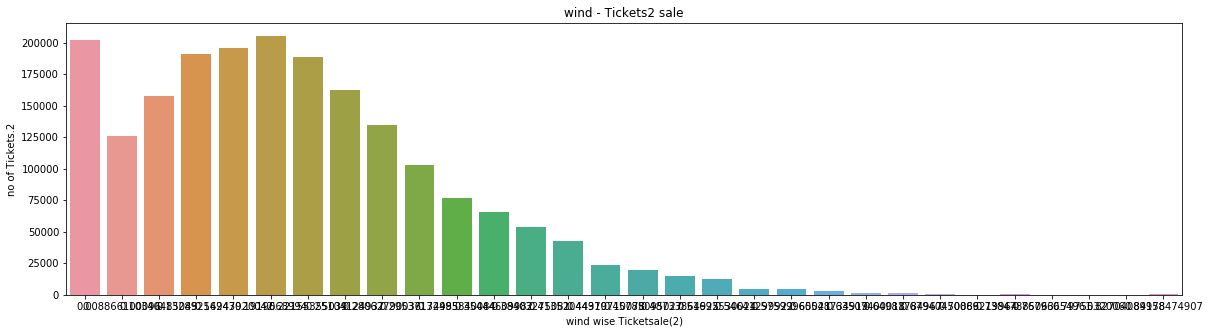

In [88]:
plt.figure(figsize=(20,5))
wind1=df_train.groupby('Wind').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='Wind',y='Ticket1',data=wind1)
plt.xlabel('wind wise Ticketsale(1)')
plt.ylabel('no of Tickets.1')
plt.title('wind - Tickets1 sale')
pass

plt.figure(figsize=(20,5))
wind2=df_train.groupby('Wind').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='Wind',y='Ticket2',data=wind2)
plt.xlabel('wind wise Ticketsale(2)')
plt.ylabel('no of Tickets.2')
plt.title('wind - Tickets2 sale')
pass

In [ ]:
#Wind with zero speed

In [84]:
data_w = df_train
dataWind0 = data_w[data_w["Wind"]==0]
dataWindNot0 = data_w[data_w["Wind"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["Humidity","month","year","hour","StandardTemperature"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["Wind"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["Wind"] = wind0Values
data_w = dataWindNot0.append(dataWind0)
data_w.reset_index(inplace=True)
data_w.drop('index',inplace=True,axis=1)

C:\Users\bbnsu_000\Anaconda2\envs\project\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


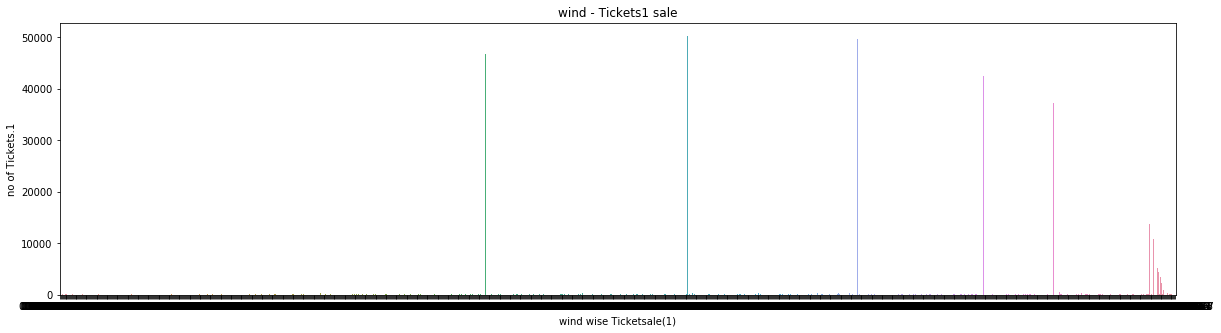

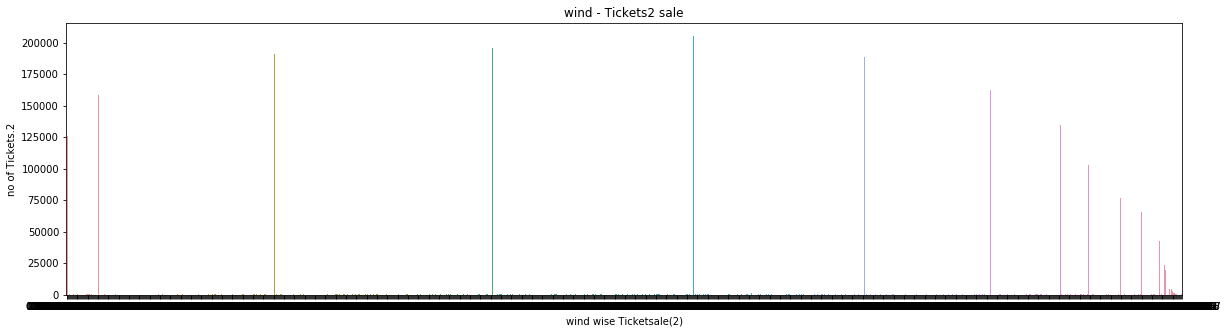

In [87]:
plt.figure(figsize=(20,5))
wind_1=data_w.groupby('Wind').agg({'Ticket1':'sum'}).reset_index()
sns.barplot(x='Wind',y='Ticket1',data=wind_1)
plt.xlabel('wind wise Ticketsale(1)')
plt.ylabel('no of Tickets.1')
plt.title('wind - Tickets1 sale')
pass

plt.figure(figsize=(20,5))
wind_2=data_w.groupby('Wind').agg({'Ticket2':'sum'}).reset_index()
sns.barplot(x='Wind',y='Ticket2',data=wind_2)
plt.xlabel('wind wise Ticketsale(2)')
plt.ylabel('no of Tickets.2')
plt.title('wind - Tickets2 sale')
pass

In [86]:
data_w.describe()

,StandardTemperature,Humidity,Wind,Ticket1,Ticket2,month,hour,day,year,dayofweek
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.474355,60.752950,0.213541,35.175500,142.251214,5.748714,11.546286,15.703786,2067.394286,3.005500
std,0.175030,19.292659,0.102210,47.354152,138.287013,3.184764,6.912059,8.720144,0.488714,2.000189
min,0.000000,0.000000,0.088661,1.000000,1.000000,1.000000,0.000000,1.000000,2067.000000,0.000000
25%,0.329752,45.805260,0.132893,5.000000,32.000000,3.000000,6.000000,8.000000,2067.000000,1.000000
50%,0.487159,60.423960,0.191967,17.000000,108.000000,6.000000,12.000000,16.000000,2067.000000,3.000000
75%,0.614588,76.991820,0.280628,47.000000,204.000000,8.000000,18.000000,23.000000,2068.000000,5.000000
max,0.989356,97.458000,0.841785,368.000000,797.000000,12.000000,23.000000,31.000000,2068.000000,6.000000


In [72]:
df_train.corr()

,StandardTemperature,Humidity,Wind,Ticket1,Ticket2,month,hour,day,year,dayofweek
StandardTemperature,1.000000,-0.050586,-0.062409,0.463301,0.360664,0.413749,0.132683,0.004799,0.052236,-0.036405
Humidity,-0.050586,1.000000,-0.290449,-0.332947,-0.283360,0.185386,-0.275567,0.080382,-0.129336,-0.026112
Wind,-0.062409,-0.290449,1.000000,0.081505,0.094995,-0.145120,0.143323,-0.003735,0.027265,-0.007439
Ticket1,0.463301,-0.332947,0.081505,1.000000,0.517793,0.104766,0.305396,-0.004476,0.139077,0.241404
Ticket2,0.360664,-0.283360,0.094995,0.517793,1.000000,0.101238,0.382201,-0.004634,0.225031,-0.087911
month,0.413749,0.185386,-0.145120,0.104766,0.101238,1.000000,-0.007844,-0.031103,-0.362341,-0.000938
hour,0.132683,-0.275567,0.143323,0.305396,0.382201,-0.007844,1.000000,-0.001052,-0.004663,-0.003540
day,0.004799,0.080382,-0.003735,-0.004476,-0.004634,-0.031103,-0.001052,1.000000,-0.043244,-0.011247
year,0.052236,-0.129336,0.027265,0.139077,0.225031,-0.362341,-0.004663,-0.043244,1.000000,-0.002511
dayofweek,-0.036405,-0.026112,-0.007439,0.241404,-0.087911,-0.000938,-0.003540,-0.011247,-0.002511,1.000000


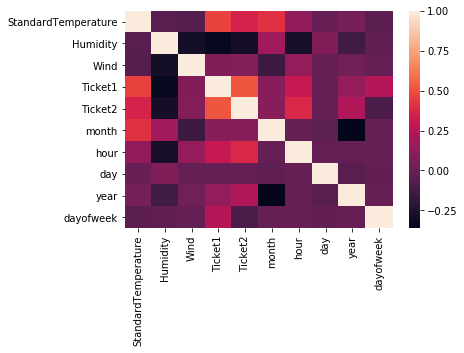

In [73]:
sns.heatmap(df_train.corr())

# Feature Selection

In [76]:
df_train.columns.values

array(['TimeStamp', 'StandardTemperature', 'Humidity', 'Wind', 'Ticket1',
       'Ticket2', 'month', 'hour', 'day', 'year', 'dayofweek'], dtype=object)

numerical features :  'StandardTemperature', 'Humidity', 'Wind'
categorical features : 'month', 'hour', 'day', 'year', 'dayofweek'

In [77]:
df_train.dtypes

TimeStamp              datetime64[ns]
StandardTemperature           float64
Humidity                      float64
Wind                          float64
Ticket1                         int64
Ticket2                         int64
month                           int64
hour                            int64
day                             int64
year                            int64
dayofweek                       int64
dtype: object

# Model1

In [ ]:
features = ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count",'weektime','weekendtime',"distance","snow fall","s1","s2","s3",'timeperiod1', 'timeperiod2', 'timeperiod3', 'timeperiod4']
X = dftrain[features]
y = dftrain['trip_duration']